# EDA On Diwali Sales Dataset

# About the Data

* Data
This dataset is taken from kaggle open source data <"/kaggle/input/diwali-sales-dataset/Diwali Sales Data.csv">

* Dataset contain the sales data of different products in India.This data has been taken from the Kaggle dataset. Dataset contain informations regarding the age, state, product, occupation, marital_status, amount of purchase, product_id, customer name and Number of orders per userId.
This analysis will be a exploratory data analysis and we will try to figure out some important insights from the data in order to make a data driven decision.

* Data crediblity and integrity
Dataset contain 11,251 rows and 15 columns. This is a big data but we can not generalize the concept for whole population but will try to figure out some strong insights that could help the users of this report to increase their sales.

# Importing Python Libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [18]:
import os
os.getcwd()

'C:\\Users\\user'

# Load the Data

In [2]:
df = pd.read_csv("C:\\Users\\user\\Downloads\Diwali_Sales_Data.csv",encoding= 'unicode_escape')
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [5]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

# Data Cleaning

* Dropped null columns

In [3]:
df.drop(['Status','unnamed1'],axis=1,inplace=True)

In [21]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

* fill null values in 'Amount' by using aggregate function Mean

In [4]:
df.fillna(df['Amount'].mean(),inplace=True)

In [5]:
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

* Changing data type of column 'Amount'

In [5]:
df['Amount'] = df['Amount'].astype('int')

In [11]:
df['Amount'].dtypes

dtype('int32')

* Re-name values of specific columns for better understanding

In [6]:
df['Marital_Status'] = df['Marital_Status'].replace({0: "Unmarried", 1: "Married"})

In [8]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,Unmarried,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,Married,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,Married,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,Unmarried,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,Married,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,Married,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,Unmarried,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,Unmarried,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,Unmarried,Karnataka,Southern,Agriculture,Office,3,206


In [7]:
df['Gender'] = df['Gender'].replace({'F' : 'Female', 'M' : 'Male'})

In [8]:
df.tail()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,Female,26-35,28,Unmarried,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,Female,26-35,35,Married,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,Female,26-35,35,Married,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,Male,0-17,16,Unmarried,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,Male,26-35,28,Married,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,Male,18-25,19,Married,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,Male,26-35,33,Unmarried,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,Female,36-45,40,Unmarried,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,Male,36-45,37,Unmarried,Karnataka,Southern,Agriculture,Office,3,206


In [15]:
df[['Age','Amount','Orders']].describe()

,Age,Amount,Orders
count,11251.000000,11251.000000,11251.000000
mean,35.421207,9453.609901,2.489290
std,12.754122,5219.569169,1.115047
min,12.000000,188.000000,1.000000
25%,27.000000,5443.500000,1.500000
50%,33.000000,8110.000000,2.000000
75%,43.000000,12671.000000,3.000000
max,92.000000,23952.000000,4.000000


# Exploratory Data Analysis

* Sex Ratio

In [28]:
gender_count=df['Gender'].value_counts()
gender_count

Gender
Female    7842
Male      3409
Name: count, dtype: int64

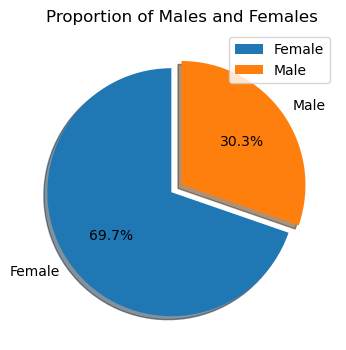

In [19]:
plt.figure(figsize=[4,5])
plt.pie(gender_count,labels=gender_count.index,autopct="%1.1f%%",shadow=True,startangle=90,explode=[0.1,0.0])
plt.title('Proportion of Males and Females')
plt.legend(loc='best')
plt.show()

* Amount spent by each Gender and discriminate them with 'Marital_Status'

In [25]:
sales_gen_df=df.groupby(['Marital_Status','Gender'])['Amount'].sum().reset_index()
sales_gen_df

,Marital_Status,Gender,Amount
0,Married,Female,30615378
1,Married,Male,13583991
2,Unmarried,Female,43815005
3,Unmarried,Male,18348191


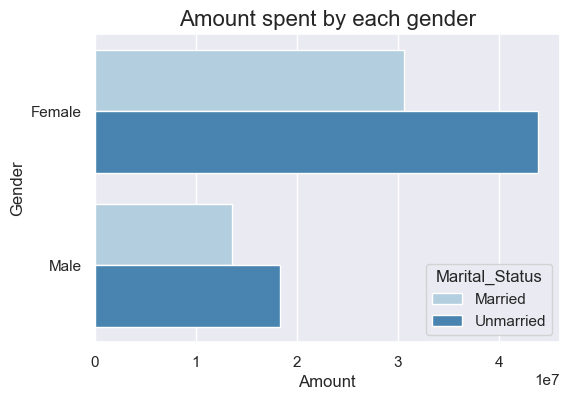

In [97]:
plt.figure(figsize=[6,4])
sns.set(style='darkgrid')
sns.barplot(x='Amount',y='Gender',data= sales_gen_df, hue='Marital_Status', palette = 'Blues')
plt.title('Amount spent by each gender', fontsize= 16)
plt.show()

* Age Distribution

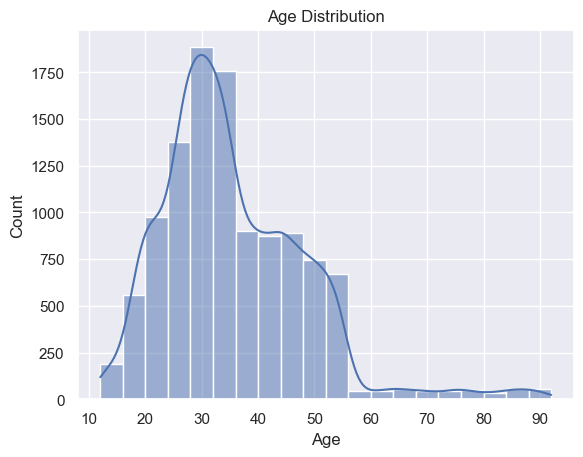

In [11]:
sns.set(style='darkgrid')
sns.histplot(x='Age', data= df, bins= 20, kde= True)
plt.title('Age Distribution', fontsize= 16)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

* Discrimate Gender over different Age group

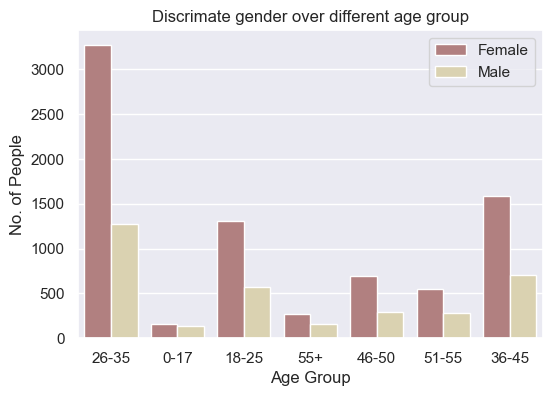

In [22]:
sns.set(style='darkgrid')
plt.figure(figsize=[6,4])
sns.countplot(data = df, x = 'Age Group', hue = 'Gender', palette = 'pink')
plt.title('Discrimate gender over different age group', fontsize= 16)
plt.ylabel('No. of People')
plt.legend(loc='best')
plt.show()

for i,v in enumerate(df[])

* Age vs Amount

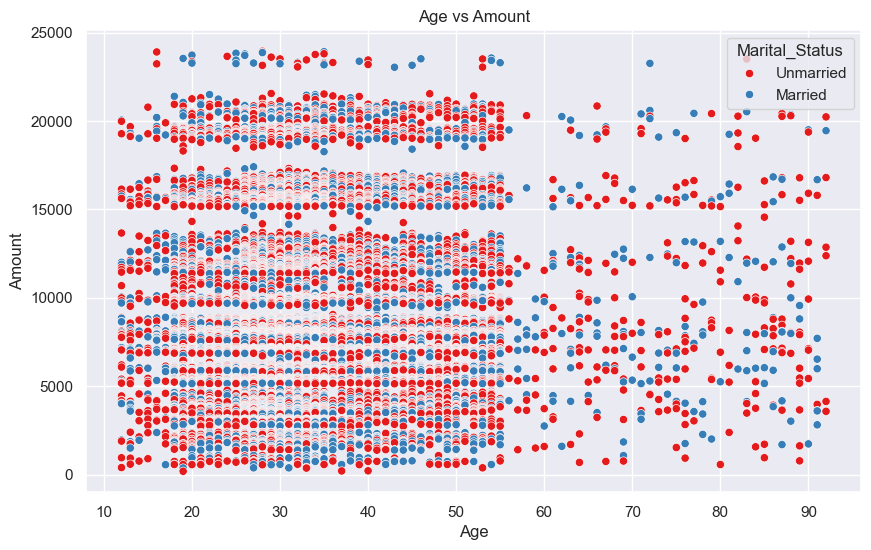

In [80]:
plt.figure(figsize=[10,6])
sns.scatterplot(x = 'Age',y= 'Amount', hue= 'Marital_Status',data = df, palette = 'Set1')
plt.title('Age vs Amount', fontsize= 16)
plt.show()

* Age vs Orders

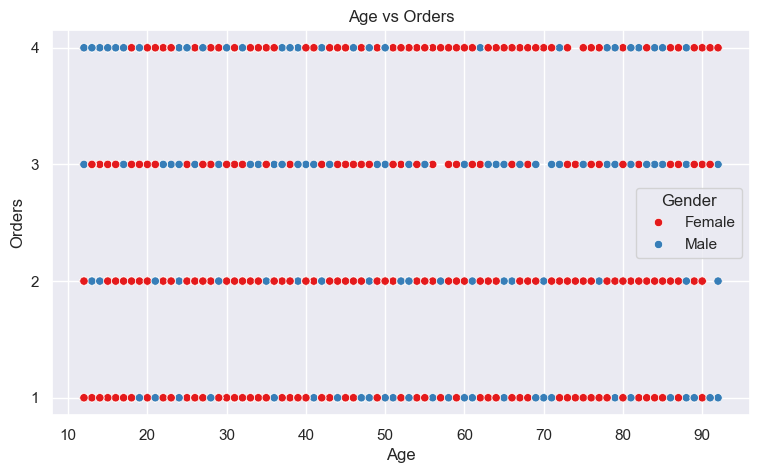

In [54]:
plt.figure(figsize=[9,5])
sns.scatterplot(x = 'Age',y= 'Orders', hue= 'Gender', data= df, palette= 'Set1')
plt.title('Age vs Orders', fontsize= 16)
plt.yticks([1,2,3,4])
plt.show()

* Top 10 states with most no. of orders

In [60]:
Orders_State = df.groupby('State')['Orders'].sum().reset_index().sort_values(by='Orders',ascending = False)
Orders_State

,State,Orders
14,Uttar Pradesh,4813
10,Maharashtra,3811
7,Karnataka,3241
2,Delhi,2744
9,Madhya Pradesh,2259
0,Andhra Pradesh,2054
5,Himachal Pradesh,1568
8,Kerala,1137
4,Haryana,1109
3,Gujarat,1070


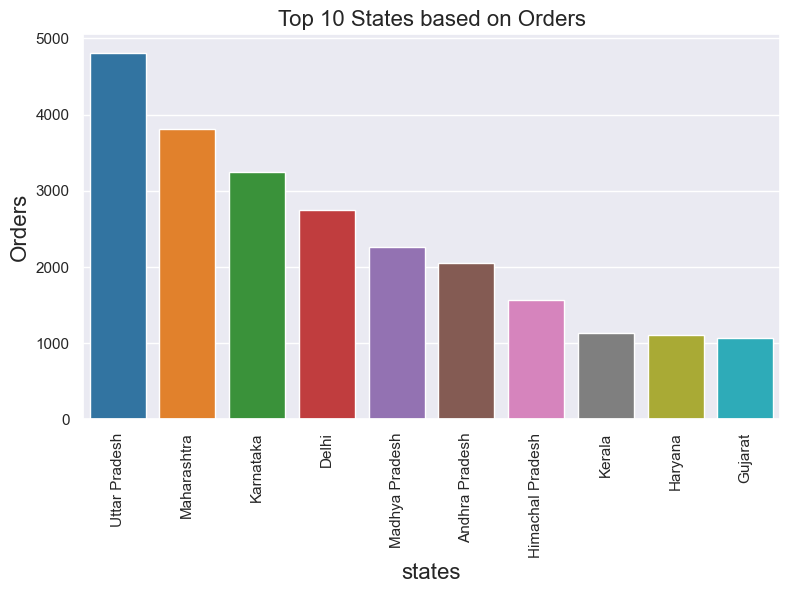

In [102]:
sns.set(style='darkgrid')
plt.figure(figsize=[9,5])
sns.barplot(data = Orders_State.head(10), x = 'State',y= 'Orders',palette = 'tab10')
plt.xlabel('states',fontsize=16)
plt.ylabel('Orders',fontsize=16)
plt.xticks(rotation= 90)
plt.title('Top 10 States based on Orders',fontsize=16)
plt.show()

* Trend of revenue based on states

In [72]:
grouped_state = df.groupby("State")["Amount"].sum().reset_index().sort_values(by= 'Amount', ascending= False)
grouped_state

,State,Amount
14,Uttar Pradesh,19393874
10,Maharashtra,14436996
7,Karnataka,13532993
2,Delhi,11632177
9,Madhya Pradesh,8120048
0,Andhra Pradesh,8046599
5,Himachal Pradesh,4963368
4,Haryana,4220175
1,Bihar,4022757
3,Gujarat,3964988


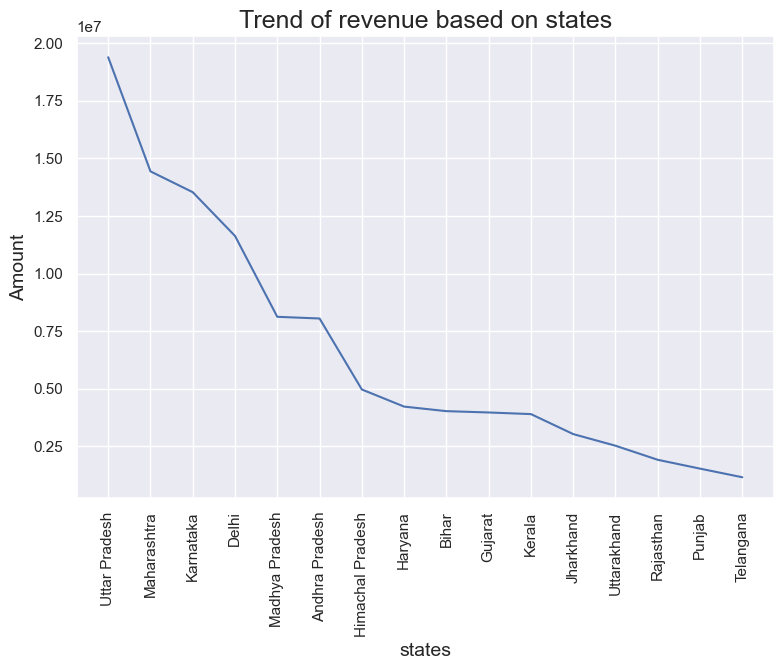

In [75]:
plt.figure(figsize=[9,6])
sns.lineplot(data = grouped_state, x = 'State',y= 'Amount')
plt.xlabel('states',fontsize=14)
plt.xticks(rotation= 90)
plt.ylabel('Amount',fontsize=14)
plt.title('Trend of revenue based on states',fontsize=16)
plt.show()

* Zonal Distribution of Customers

In [32]:
Zonal_Distribution= df['Zone'].value_counts()
Zonal_Distribution

Zone
Central     4296
Southern    2695
Western     1955
Northern    1491
Eastern      814
Name: count, dtype: int64

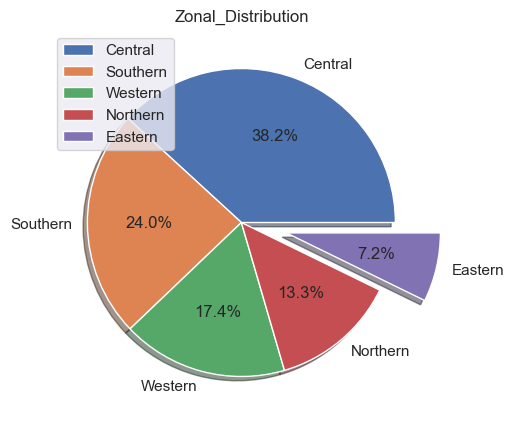

In [90]:
plt.figure(figsize=[11,5])
plt.pie(Zonal_Distribution, labels= Zonal_Distribution.index, autopct= '%1.1f%%', 
        explode= (0.0,0.0,0.0,0.0,0.3),shadow= True)
plt.title('Zonal_Distribution')
plt.legend(loc= 2)
plt.show()

* Zone vs Amount

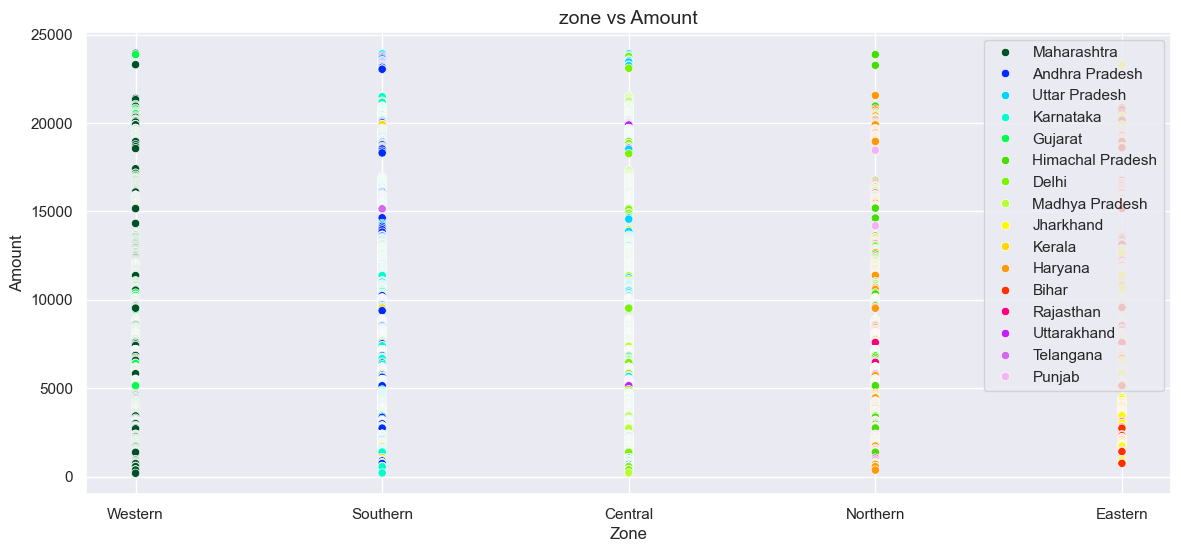

In [55]:
plt.figure(figsize= [14,6])
sns.scatterplot(x='Zone', y= 'Amount', hue= 'State', data=df,palette = 'gist_ncar')
plt.title('zone vs Amount',fontsize=16)
plt.legend()
plt.show()

* Amount spent by each Occupation

In [58]:
Sales_Occupation = df.groupby('Occupation')['Amount'].sum().reset_index()
Sales_Occupation

,Occupation,Amount
0,Agriculture,2593087
1,Automobile,5378049
2,Aviation,12602298
3,Banking,10789516
4,Chemical,5306889
5,Construction,3597511
6,Food Processing,4070670
7,Govt,8517212
8,Healthcare,13034586
9,Hospitality,6395311


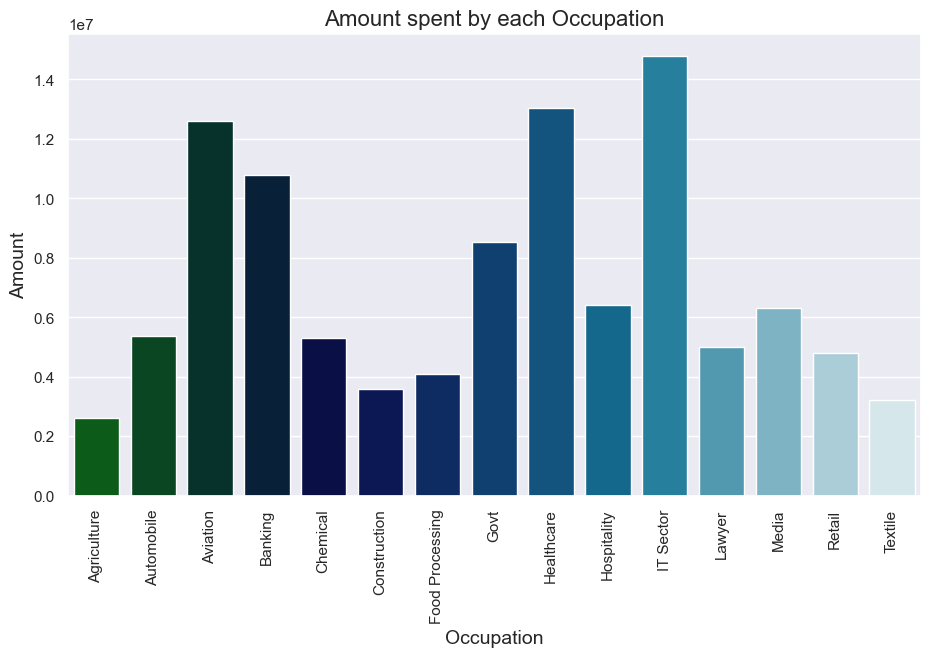

In [82]:
plt.figure(figsize=[11,6])
sns.barplot(x = 'Occupation',y= 'Amount',data= Sales_Occupation, palette = 'ocean')
plt.xlabel('Occupation',fontsize=14)
plt.ylabel('Amount',fontsize=14)
plt.xticks(rotation= 90)
plt.title('Amount spent by each Occupation',fontsize=16)
plt.show()

* Top selling Product Categroy

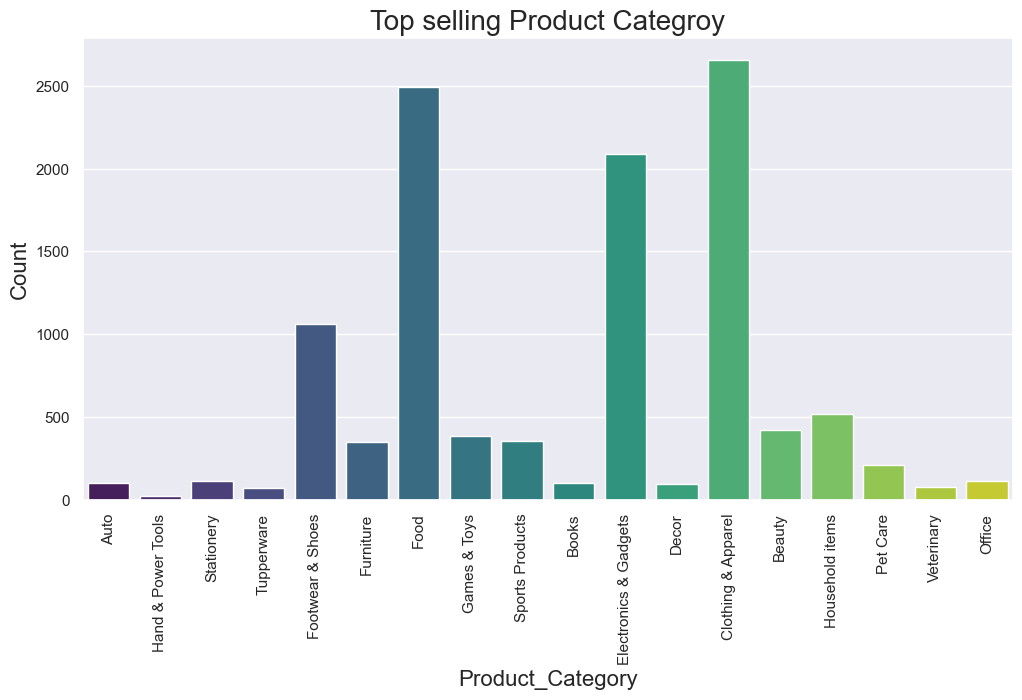

In [85]:
plt.figure(figsize=[12,6])
sns.barplot(data = df, x = 'Product_Category', palette = 'viridis')
plt.title('Top selling Product Categroy',fontsize=20)
plt.xlabel('Product_Category',fontsize=16)
plt.ylabel('Count',fontsize=16)
plt.xticks(rotation= 90)
plt.show()